### PRACTICA 3 SUGENO
Alejandro Manuel López Gómez

Blanca María de Pedro Morejón

In [28]:
# Data management
# ------------------------------------------------------------------------------
import numpy as np
import pandas as pd

# Graphics
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt

# Preprocessing and modelling
# ------------------------------------------------------------------------------
from simpful import *


# Configuración warnings
# ------------------------------------------------------------------------------
import warnings
#warnings.filterwarnings('once')
warnings.filterwarnings('ignore')

FS = FuzzySystem()

  ____  __  _  _  ____  ____  _  _  __   
 / ___)(  )( \/ )(  _ \(  __)/ )( \(  ) v2.11.1 
 \___ \ )( / \/ \ ) __/ ) _) ) \/ (/ (_/\ 
 (____/(__)\_)(_/(__)  (__)  \____/\____/

 Created by Marco S. Nobile (m.s.nobile@tue.nl)
 and Simone Spolaor (simone.spolaor@unimib.it)



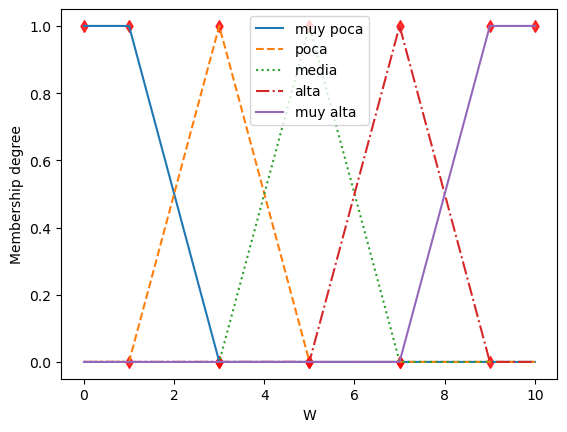

In [29]:
baja = FuzzySet(points=[[0.0, 1.0],  [1.0, 1.0], [3.0, 0.0]], term="baja")
media = FuzzySet(points=[[1.0, 0.0], [3.0, 1.0], [5.0, 0.0]], term="media")
alta = FuzzySet(points=[[3.0, 0.0],  [5.0, 1.0], [6.0, 1.0]], term="alta")
FS.add_linguistic_variable("V1", LinguisticVariable([baja, media, alta], concept="m/seg"))
FS.add_linguistic_variable("V2", LinguisticVariable([baja, media, alta], concept="m/seg"))

muy_poca = FuzzySet(points=[[0.0, 1.0],  [1.0, 1.0], [3.0, 0.0]], term="muy poca")
poca = FuzzySet(points=[[1.0, 0.0],  [3.0, 1.0], [5.0, 0.0]], term="poca")
media = FuzzySet(points=[[3.0, 0.0],  [5.0, 1.0], [7.0, 0.0]], term="media")
alta = FuzzySet(points=[[5.0, 0.0], [7.0, 1.0], [9.0, 0.0]], term="alta")
muy_alta = FuzzySet(points=[[7.0, 0.0],  [9.0, 1.0], [10.0, 1.0]], term="muy alta")
FS.add_linguistic_variable("Potencia", LinguisticVariable([muy_poca, poca, media, alta, muy_alta], concept="W"))
FS.plot_variable('Potencia')

In [30]:
FS.set_crisp_output_value("R1",1.6+0.5*4.5+0.9*3)
FS.set_crisp_output_value("R2",3.2+5.2*4.5+2.6*3)
FS.set_crisp_output_value("R3",0.8+1.5*4.5+3.4*3)
FS.set_crisp_output_value("R4",0.8+0.2*4.5+0.1*3)
FS.set_crisp_output_value("R5",0.6+0.6*4.5+0.9*3)
FS.set_crisp_output_value("R6",1.9+0.5*4.5+2.3*3)
FS.set_crisp_output_value("R7",2.6+1.3*4.5+0.6*3)
FS.set_crisp_output_value("R8",0.6+1.5*4.5+0.9*3)
FS.set_crisp_output_value("R9",1.6+0.4*4.5+4.2*3)

 * Detected Sugeno model type


In [31]:
R1 = "IF (V1 IS alta) AND (V2 IS alta) THEN (Potencia IS R1)"
R2 = "IF (V1 IS media) AND (V2 IS alta) THEN (Potencia IS R2)"
R3 = "IF (V1 IS baja) AND (V2 IS alta) THEN (Potencia IS R3)"
R4 = "IF (V1 IS alta) AND (V2 IS media) THEN (Potencia IS R4)"
R5 = "IF (V1 IS media) AND (V2 IS media) THEN (Potencia IS R5)"
R6 = "IF (V1 IS baja) AND (V2 IS media) THEN (Potencia IS R6)"
R7 = "IF (V1 IS alta) AND (V2 IS baja) THEN (Potencia IS R7)"
R8 = "IF (V1 IS media) AND (V2 IS baja) THEN (Potencia IS R8)"
R9 = "IF (V1 IS baja) AND (V2 IS baja) THEN (Potencia IS R9)"
FS.add_rules([R1,R2,R3,R4,R5,R6,R7,R8,R9])

In [32]:
FS.set_variable("V1",4.5)
FS.set_variable("V2",3)

In [33]:
FS.get_firing_strengths()

[0.0, 0.0, 0.0, 0.75, 0.25, 0.0, 0.0, 0.0, 0.0]

In [34]:
print(FS.Sugeno_inference(["Potencia"]))

{'Potencia': 3.0}
